In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import  tensorflow as tf

In [148]:
df=pd.read_csv('./datasets/churn_modelling.csv')

In [149]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1] .values


In [190]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [151]:
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [152]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [155]:
ann = tf.keras.models.Sequential() 

In [156]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [157]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [158]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

In [159]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [166]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100,verbose=1) 

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3495
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3301
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3265
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3367
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3338
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3140
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3265
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3415
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3427
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3348
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3311
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3353
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3322
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3337
Epoch 15/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1

In [171]:
x_test = sc.transform(x_test)


In [172]:
y_pred = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [180]:
Y_pred = (y_pred > 0.5)

In [184]:
print(Y_pred)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


<Axes: >

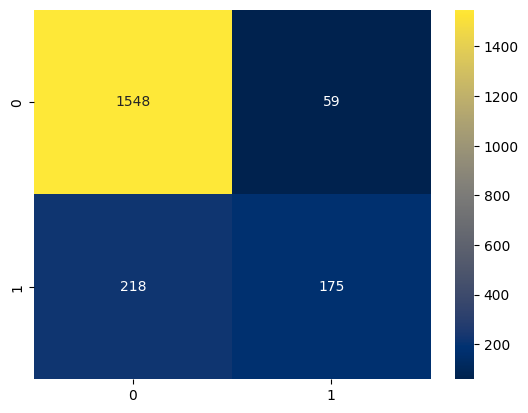

In [186]:
conf_matrix = confusion_matrix(y_test, Y_pred)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, cmap='cividis',fmt='d')

In [187]:
print("Matrice de confusion :\n", confusion_matrix(y_test, Y_pred))
print("Accuracy :",  accuracy_score(y_test, Y_pred))
print("Precision :", precision_score(y_test, Y_pred))
print("Recall :", recall_score(y_test, Y_pred))
print("F1 Score :", f1_score(y_test, Y_pred))

Matrice de confusion :
 [[1548   59]
 [ 218  175]]
Accuracy : 0.8615
Precision : 0.7478632478632479
Recall : 0.44529262086513993
F1 Score : 0.5582137161084529


In [188]:
# Prédire si un client peut quitter la banque ou non
new_data = np.array([[600, 'France', 'male', 40, 3, 60000, 2, 1, 1, 500]])
#trData=np.array(ct.fit_transform(new_data[]))
new_data = sc.transform(new_data)
prediction = ann.predict(new_data)
prediction = (prediction > 0.5)
print("Le client peut quitter la banque ?")
if prediction:
    print("Oui")
else:
    print("Non")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Le client peut quitter la banque ?
Non
